# STA 208: Homework 3


### Exercise 1 (Probabilistic PCA and EM)

In Week 5-2, we learned the Probabilistic PCA model proposed by Tipping and Bishop (1999). 

Consider the model 
$$
x_i = \mu + \theta w_i + \sigma^2 \varepsilon_i,
$$
where 
$\theta \in \mathbb{R}^{p \times r}$ is the loadings matrix (i.e., $\theta = VD$),
$w_i \overset{\text{i.i.d}}{\sim} N(0, I_r)$, and $\varepsilon_i \overset{\text{i.i.d}}{\sim} N(0, I_p)$.
For now, let's assume $\mu = 0$ for simplicity.

The likelihood function can be written as 
$$
\mathcal{L}(\theta, \sigma^2 | x_1, \dots, x_n) = \prod_{i=1}^n \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i,
$$
and it's log-likelihood function is given by 
$$
\ell(\theta, \sigma^2 | x_1, \dots, x_n) = \sum_{i=1}^n \log \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i.
$$
To derive the MLE, we will use the EM algorithm:

1. Derive the expectation-step (E-step) of the EM algorithm
2. Obtain the expressions of $\hat \theta$ and $\hat \sigma^2$ from the maximization step (M-step) 
3. Describe how you implement the algorithm (e.g., you can write a sudo code). How can you make sure $\langle \theta_j, \theta_k \rangle = 0$ for any $j \neq k$ in each iteration? ($\theta_j$ is the $j$-th column of $\theta$)?

**Solution 1.**

Starting with the log-likelihood function, it can be shown that

\begin{align*}
\ell(\theta, \sigma^2 | x_1, \dots, x_n) &= \sum_{i=1}^n \ln \int N(x_i | \theta w_i, \sigma^2 I_p) N(w_i | 0, I_r) dw_i \\

&= \sum_{i=1}^n \ln \int p(x_i, w_i) dw_i \\

&= \sum_{i=1}^n \ln\int q(w_i) \frac{p(x_i, w_i)}{q(w_i)}  dw_i \quad \text{introducting q, a function of w} \\
&= \sum_{i=1}^n \ln \mathbb{E}_{q(w_i)} \left[\frac{p(x_i, w_i)}{q(w_i)} \right] \\

& \geq \sum_{i=1}^n  \mathbb{E}_{q(w_i)} \left[ \ln \left( \frac{p(x_i, w_i)}{q(w_i)} \right) \right] \text{ Holds by Jensen's Inequality } \\

&= \sum_{i=1}^n \int q(w_i) (\ln p(x_i, w_i) - \ln q(w_i)) dw_i  \\

& \text{We need a choice of } q(w_i) \text{ that will turn the quantity in the expectation to a constant. A good choice is } P(w_i \mid x_i) \\

&= \sum_{i=1}^n \int p(w_i \mid x_i) \ln p(x_i, w_i) dw_i \\

&= \sum_{i=1}^n \mathbb{E}_{w_i \mid x_i} \ln p(x_i, w_i)\\
\end{align*}

This expression describes taking the expectation of the complete data log-likelihood but with respect to the posterior distribution of the latent variable.

\begin{align*}
&= \sum^n_{i=1}\mathbb{E}\left[ln\left[\det(2\pi\sigma^2 \mathbb{I_p})^{\frac{-1}{2}} exp\left\{-\frac{1}{2}(x_i - \theta w_i)^T(\sigma^2 \mathbb{I_p})^{-1}(x_i - \theta w_i)   \right\} (2\pi)^{-\frac{r}{2}} exp \left\{ -\frac{1}{2}w^T_i\mathbb{I_r}w_i \right\}      \right]       \right] \\

&= \sum^n_{i=1}\mathbb{E}\left[ -\frac{p}{2}\ln(2\pi\sigma^2\mathbb{I_p}) - \frac{1}{2\sigma^2}(x_i - \theta w_i)^T(x_i - \theta w_i) - \frac{r}{2}ln(2\pi) - \frac{1}{2}w_i w^T_i     \right] \\ 


&= \sum^n_{i=1}\mathbb{E}\left[ -\frac{p}{2}ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}x^T_ix_i + \frac{1}{2\sigma^2}x^T_i\theta w_i + \frac{1}{2\sigma^2}w^T_i\theta^Tx_i - \frac{1}{2\sigma^2}w^T_i\theta^T\theta w_i - \frac{r}{2}ln(2\pi) - \frac{1}{2} w_i w^T_i    \right] \\ 

&= \sum^n_{i=1} \left[ ln(2\pi\sigma^2) - \frac{1}{2}x^T_ix_i + \frac{1}{\sigma^2}\mathbb{E}(w^T_i)\theta^T x_i - \frac{1}{2} \mathbb{E}(w^T_i w_i) \theta^T \theta - \frac{r}{2}ln(2\pi) - \frac{1}{2} \mathbb{E}(w_i w^T_i) \right] (*) \\

\end{align*}

So at this point, it is clear that we need the posterior distribution of the latent variable, $p(w_i | x_i)$:

$$
p(w_i | x_i) = \frac{p(w_i,x_i)}{p(x)} = \frac{p(x_i | w_i)}{p(x_i)} = \frac{N(x_i | \theta w_i, \sigma^2\mathbb{I_p}) N(w_i | 0, \mathbb{I_r})}{N(x_i | 0, \theta \theta^T + \sigma^2 \mathbb{I_r})}
$$

Simplifying, 

$$

w_i | x_i \sim N((\theta^T\theta + \sigma^2\mathbb{I})^{-1}\theta^Tx_i, \frac{1}{\sigma^2}(\theta^T\theta + \sigma^2\mathbb{I}))
$$
(I underestimated how long it would take to write all my solutions in LaTeX, I will attach my handwritten solutions for my derivation of this posterior)

With the posterior distribution, it is easy to see what the Expectations in $(*)$ are:

$$
\mathbb{E}(w_i) = (\theta^T\theta + \sigma^2\mathbb{I})^{-1}\theta^Tx_i
$$

$$
\mathbb{E}(w_i w^T_i) = \sigma^2 (\theta^T\theta + \sigma^2\mathbb{I})^{-1} + \mathbb{E}(w_i)\mathbb{E}(w_i)^T
$$



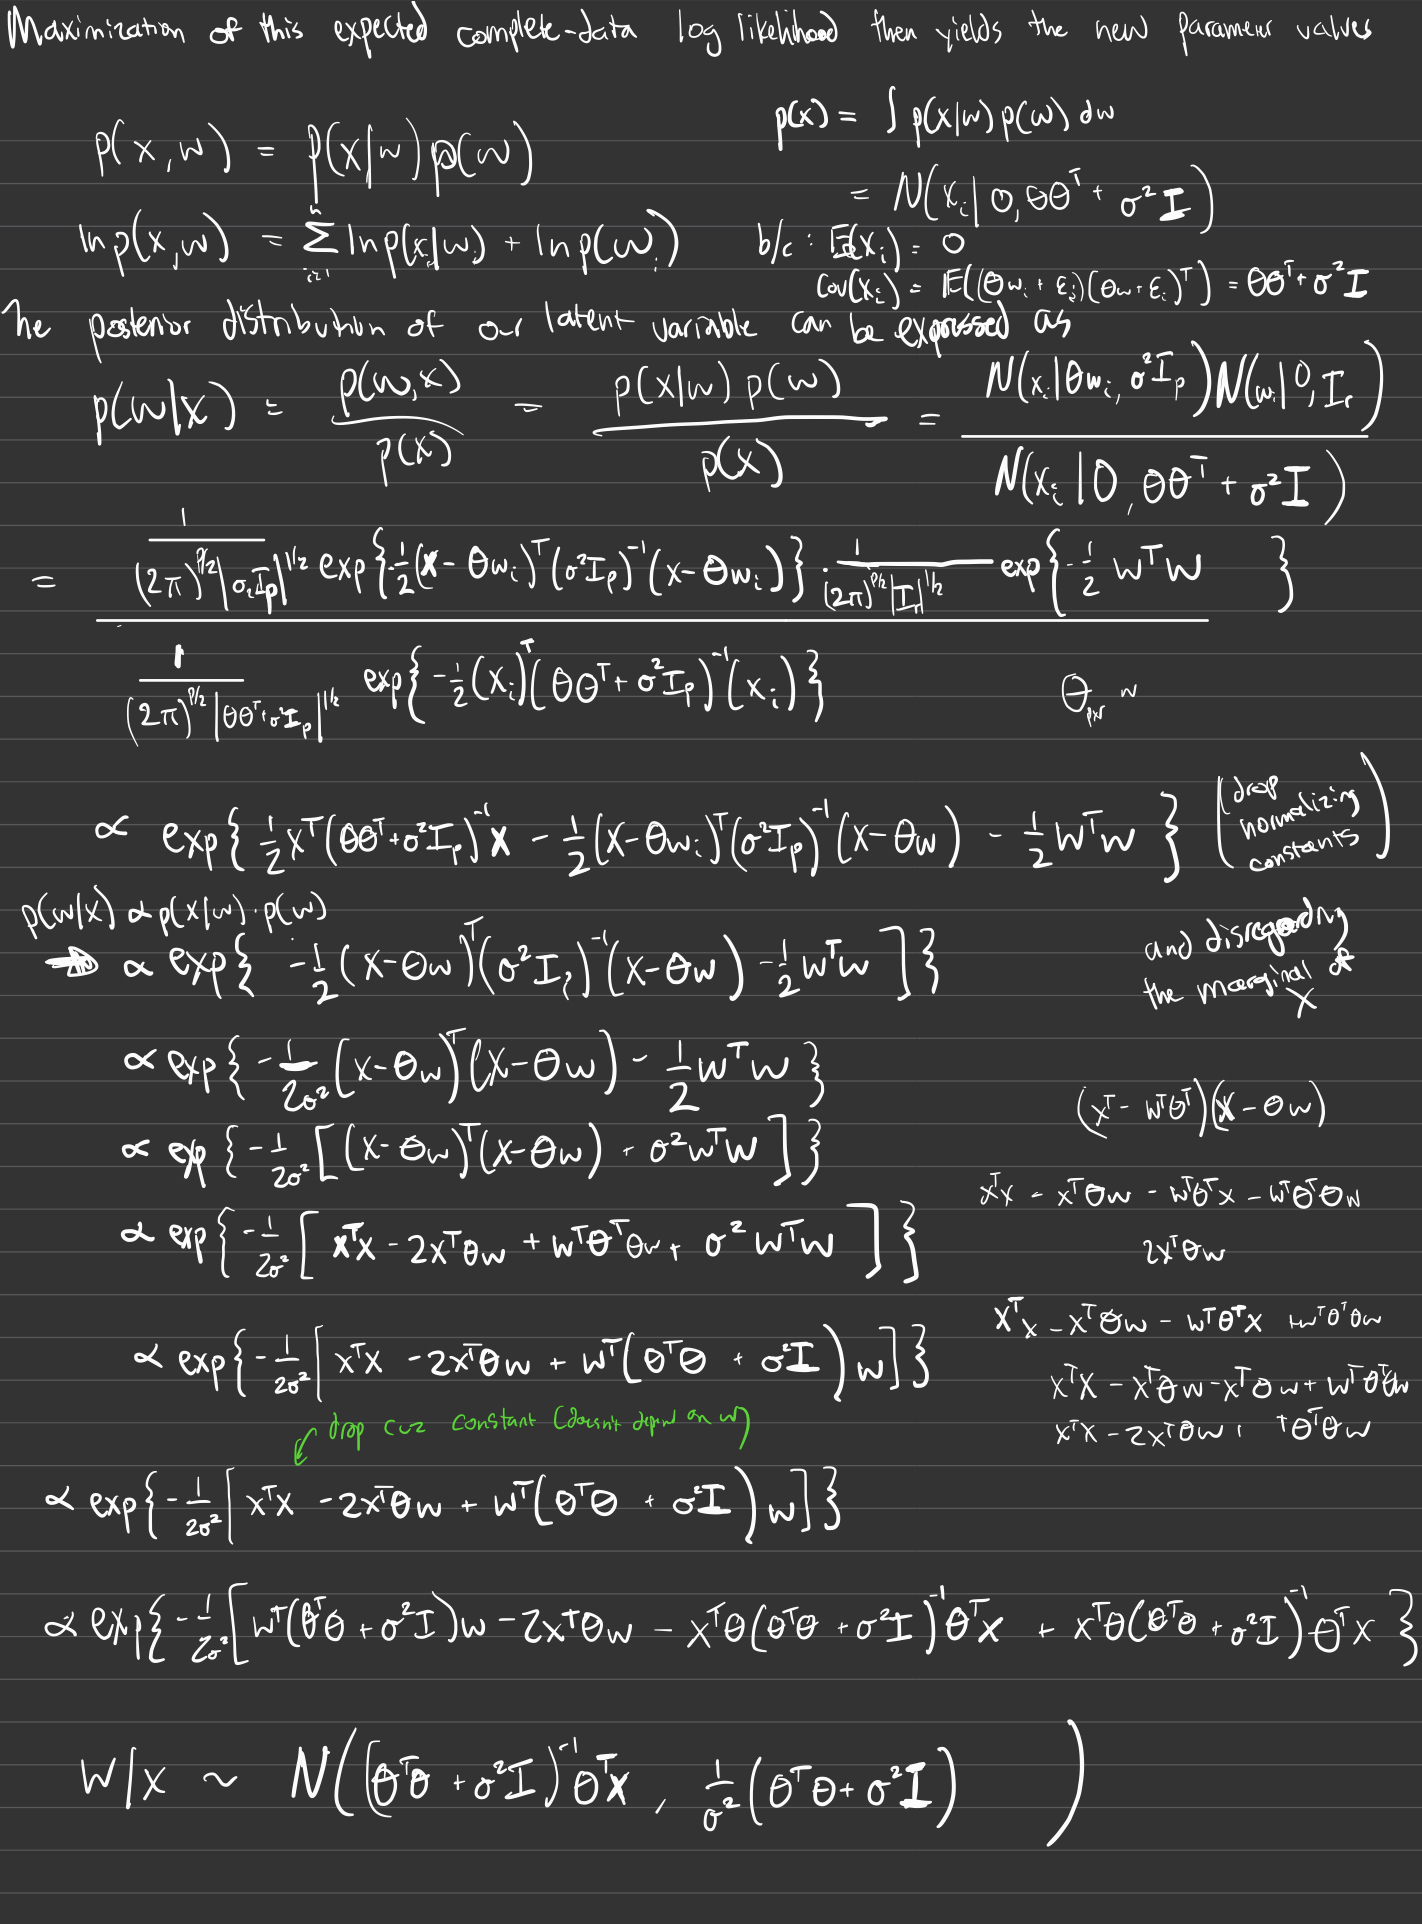

In [328]:
from IPython.display import Image
Image("/Users/collinkennedy/Dropbox/R_dropbox/STA208/STA208/hw3_work.jpeg")

**Solution 2.**

\begin{align*}
\theta_{new} &= \argmax_{\theta} \mathbb{E}lnp(X,w | \theta, \sigma^2) \\



 &\Rightarrow \argmax_{\theta}  -\sum^n_{i=1}\frac{p}{2}ln(2\pi\sigma^2) + \frac{1}{2}Tr(\mathbb{E}(w_iw^T_i)) + \frac{1}{2\sigma^2}||x_i - \mu||^2 - \frac{1}{2\sigma^2}\mathbb{E}(w_i)^T\theta^Tx_i + \frac{1}{2\sigma^2}Tr(\mathbb{E}(w_iw^T_i)\theta^T\theta) \\ 

&\Rightarrow \frac{d}{d\theta}\left[  - \frac{1}{2\sigma^2}\mathbb{E}(w_i)^T\theta^Tx_i + \frac{1}{2\sigma^2}Tr(\mathbb{E}(w_iw^T_i)\theta^T\theta)   \right]\\



&\Rightarrow \frac{1}{\sigma^2}\sum^n_{i=1}\mathbb{E}(w_i)^Tx_i = \theta\frac{1}{\sigma^2}\sum^n_{i=1}\mathbb{E}(w_iw^T_i)\\




&\Rightarrow \hat{\theta} = \frac{\sum^n_{i=1}\mathbb{E}(w_i)^Tx_i}{\sum^n_{i=1}\mathbb{E}(w_iw^T_i)}

\end{align*}


$\sigma^2_{new}$:


\begin{align*}
 &= \frac{dQ}{d\sigma^2}\left[  -\sum^n_{i=1}\left\{\frac{p}{2}ln(2\pi\sigma^2) + \frac{1}{2}Tr(\mathbb{E}(w_iw^T_i)) + \frac{1}{2\sigma^2}||x_i - \mu||^2 - \frac{1}{2\sigma^2}\mathbb{E}(w_i)^T\theta^Tx_i + \frac{1}{2\sigma^2}Tr(\mathbb{E}(w_iw^T_i)\theta^T\theta) \right\}\right] = 0 \\


&= -\sum^n_{i=1}\left\{\frac{p}{2\nu} - \frac{1}{2\nu^2}\mathbb{E}(w_i)^Tx_i - \frac{1}{2\nu^2}Tr\left[\mathbb{E}(w_iw^T_i)\theta^T\theta   \right] \right\} = 0 \quad (\text{letting $\nu = \sigma^2$}) \\

&\Rightarrow \frac{np}{2\nu} = \sum^{n}_{i=1}\frac{1}{2\nu^2}||x^2_i|| - \sum^{n}_{i=1}\frac{1}{\nu^2}\mathbb{E}(w_i)^T\theta^Tx_i + \sum^{n}_{i=1}\frac{1}{2\nu^2}Tr\left[\mathbb{E}(w_iw^T_i)\theta^T\theta   \right]\\

&\Rightarrow \frac{\nu np}{2} = \sum^{n}_{i=1}\frac{1}{2}||x_i||^2 - \sum^{n}_{i=1}\mathbb{E}(w_i)^T\theta^Tx_i + \sum^{n}_{i=1}\frac{1}{2}Tr\left[\mathbb{E}(w_iw^T_i)\theta^T\theta \right]\\


&\Rightarrow \sigma^2_{new} = \frac{1}{np}\sum^{n}_{i=1}\left\{||x_i||^2 - 2\mathbb{E}(w_i)^T\theta^Tx_i + 
Tr\left[\mathbb{E}(w_iw^T_i)\theta^T\theta  \right] \right\}


\end{align*}



**Solution 3.**
The EM algorithm for probabilistic PCA initializes the parameters, and then iterates between the Expectation step (E-Step) and Maximization Step (M-Step) until convergence, i.e., when the absolute difference between the likelihood at the previous iteration and the likelihood evaluated at the current iteration falls below some threshold:
$$
|\ell(\theta_{new}, \sigma^2_{new}) - \ell(\theta_{old},\sigma^2_{old})| < \epsilon
$$

During the E-Step, the latent variable w_i is estimated, given the values of the parameters $\theta$ and $\sigma^2$ at the current iteration as well as the data $X$. In other words, expression(s) for $\mathbb{E}(w_i)$ and $\mathbb{E}(w_iw^T_i)$ are obtained from the posterior $p(w_i | x, \theta, \sigma^2)$. In the M-Step, new parameter estimates are obtained, and then those are the parameters that are used in the next iteration of the E-step, so on and so forth until convergence.

### Exercise 2 (Gaussian mixture model and MCMC)

We have discussed how to estimate the Gaussian mixture model using EM in class. In this question, we explore the Bayesian finite Gaussian mixture model using MCMC. 

Recall the finite Gaussian mixture model with $K$ components:
$$
p(\boldsymbol x | \boldsymbol \pi, \boldsymbol \mu, \boldsymbol \sigma^2) = \prod_{i=1}^n \sum_{k=1}^K \pi_k N(x_i | \mu_i, \sigma_k^2),
$$
where $\boldsymbol x = (x_1, \dots, x_n)$, $\boldsymbol \pi = (\pi_1, \dots, \pi_K)$ is a vector of mixing proportions, $\boldsymbol \mu = (\mu_1, \dots, \mu_K)$ and $\boldsymbol \sigma^2 = (\sigma_1^2, \dots, \sigma_K^2)$ are means and variances of Gaussian densities (here, $\mu_k$ and $\sigma_k$ are scalars). 

In Bayesian setting, we introduce a latent variable $\boldsymbol z = (z_1, \dots, z_n)$, $z_j = k$, $k = 1, \dots, K$. Then, the model can be written as 

\begin{align}
& z_i | \boldsymbol \pi \sim \text{Multinomial}(\pi_1, \dots, \pi_K),\\
& x_i | z_i = k \sim N(x_i | \mu_k, \sigma^2_k).
\end{align}

We consider the following conjugate priors:

\begin{align}
& \boldsymbol \pi \sim \text{Dirichlet}(\alpha_1, \dots, \alpha_K),\\
& \mu_k|\sigma_k^2 \sim N(0, \rho_k\sigma_k^2),\\
& \sigma_k^{-2} \sim \text{Gamma}(a, b),
\end{align}

where $\alpha_1, \dots, \alpha_K, \rho_k, a, b$ are some hyperparamters which are fixed. Their values can be chosen by the user. For Dirichlet distribution, please check its density function [here](https://en.wikipedia.org/wiki/Dirichlet_distribution).

We will develop an MCMC algorithm for the model:

1. Derive the posterior distribution $p(z_i = k |\boldsymbol z_{-i}, \boldsymbol \pi, \boldsymbol \mu, \boldsymbol \sigma^2, \boldsymbol x)$ for each $i = 1, \dots, n$, where $\boldsymbol z_{-i} = (z_1, \dots, z_{i-1}, z_{i+1}, \dots, z_n)$ 
2. Derive the posterior distribution $p(\boldsymbol \pi | \boldsymbol x, \boldsymbol z)$ (hint: Dirichlet prior is conjugate with the multinomial distribution [see "Table of conjugate distributions"])(https://en.wikipedia.org/wiki/Conjugate_prior)
3. Derive the posterior distribution $p(\sigma_k^{-2} | \boldsymbol x, \boldsymbol z)$
for each $k = 1, \dots, K$
4. Derive the posterior distribution $p(\mu_k | \boldsymbol x, \boldsymbol z, \sigma_k^{2})$ for each $k = 1, \dots, K$
5. Write a function, call it ``MCMCGaussianFiniteMixture``, for the MCMC algorithm (choose $K = 3$).

6. Fit the ``mouse.csv`` data with the function ``MCMCGaussianFiniteMixture`` you wrote (choose $K = 3$, set the total iteration to be $5,000$ or larger. For those hyperparameters, you can choose $\alpha_1, \dots, \alpha_K = 1, \rho_k = 1$, $a = 2, b = 2$; other values are possible as well), 
    - a) plot the MCMC chains for $\pi_k$, $\mu_k$ and $\sigma_k$ for all $k = 1, \dots, K = 3$ (the title of each plot should include the corresponding variable name)
    - b) how many draws would you consider as burnin?
    - c) plot the ACF (autocorrelation) function for each chain after removing the burnin. 
    - d) remove those draws you considered as burnin, and obtain the posterior means and 95\% credible intervals for each quantity. Compare those values with the MLE obtained using EM (i.e., fit the data using the [``GaussianMixture``](`https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) package). Comment on your findings (e.g., are those values from EM close to their posterior means? Do the 95\% credible intervals include those values from EM?)
    - e) (bonus point: 2 points) Using the MCMC draws you obtained to classify the mouse data (i.e., predict the mouse data and determine the label each data point belongs to). Plot the mouse data with the predicted labels using ``red`` color for Left Ear, ``green`` color for Right Ear, and ``blue`` for Head. Compare the plot with the one from EM (you can find the plot in the Week 5-2's lecture notes)

Note: ``BayesianGaussianMixture`` in sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture) does not use the MCMC algorithm. It uses the so-called _variational Bayes method_, which has not been discussed yet. 

**Solution 1.**
$$
p(z_i | x_i, z_{-i}, \pi, \mu,\sigma^2) = \frac{p(x | z,\pi, \mu,\sigma^2)p(z_i | z_{-i}, \pi, \mu,\sigma^2)}{p(x|z_{-i}, \pi, \mu,\sigma^2)}
$$

$$
= \frac{\pi_{z_i} N(x_i;u_{z_i},\sigma^2_{z_i})}{\sum^K_{k=1}\pi_{k} N(x_i;u_{k},\sigma^2_{k})}
$$


**Solution 2.**
Using the fact that the Dirichlet distribution is the conjugate prior of the Multinomial distribution, we know that
$$
\pi( \pi | \textbf{x},\textbf{z}) \propto p(\pi) * p(\textbf{x} | \pi, n)
$$
where our prior distribution (Dirichlet) is given by 
$$
p(\pi) = \frac{1}{\mathbb{B(\textbf{a})}} \prod^K_{i=1}\pi_i^{\alpha_i - 1}
$$
and the likelihood of our data (Multinomial) is given by 
$$
p(\textbf{z}|\pi, n) = \frac{n!}{z_1! z_2! ... z_k!} \prod^K_{i=1}\pi_i^{z_i}
$$

So we have
$$
\pi( \pi | \textbf{x},\textbf{z}) \propto p(\pi) * p(\textbf{x} | \pi, n)
$$

$$
\Rightarrow \pi( \pi | \textbf{x},\textbf{z}) \propto \prod^K_{i=1}\pi_i^{\alpha_i - 1} \prod^K_{i=1}\pi_i^{z_i}
$$

$$
\Rightarrow \pi( \pi | \textbf{x},\textbf{z}) \propto \prod^K_{i=1}\pi_i^{\alpha_i + z_i - 1}
$$

Noting that this is the Dirichlet-Multinomial distribution, 

$$
\pi( \pi | \textbf{x},\textbf{z}) \sim Dir(\alpha_1 +z_1, \alpha_2 + z_2, ... ,\alpha_k + z_k) = \frac{1}{\mathbb{B(\textbf{a + z})}} \prod^K_{i=1}\pi_i^{\alpha_i + z_i - 1}
$$


**Solution 3.**
Here, we use the fact that the Gamma distribution is the conjugate prior of the Normal Distribution.
Again noting that the $\textbf{posterior}$ is proportional to the $\textbf{prior}$ distribution times the $\textbf{likelihood}$ we obtain (I drop the normalizing constants):

$$
p(\sigma_k^{-2} | \boldsymbol x, \boldsymbol z) \propto (\sigma^{-2}_k)^{\alpha-1}e^{-b\sigma^{-2}_k} e^{-\frac{1}{2\sigma^2_k}\sum^n_{i=1}(x_i - \mu_k)^2}
$$

$$
\Rightarrow p(\sigma_k^{-2} | \boldsymbol x, \boldsymbol z) \propto (\sigma^{-2}_k)^{\alpha-1}e^{-b\sigma^{-2}_k} e^{-\frac{\sigma^{-2}_k}{2}\sum^n_{i=1}(x_i - \mu_k)^2}
$$

$$
\Rightarrow (\sigma^{-2}_k)^{\alpha - 1}(\sigma^{-2}_k)^{\frac{n}{2}}\rm{e}^{-b\sigma^{-2}_k - \frac{\sigma^{-2}_k}{2}\sum^n_{i=1}(x_i - \mu_k)^2}
$$

Lastly, we end up with:

$$
(\sigma^{-2}_k)^{(\alpha - \frac{n}{2})-1}{\rm e}^{-(b + \frac{1}{2}\sum^n_{i=1}(x_i - \mu_k)^2) \sigma^{-2}_k}
$$

Which is clearly

$$
p(\sigma_k^{-2} | \boldsymbol x, \boldsymbol z) \sim Gamma(\alpha + \frac{n}{2}, b + \frac{1}{2}\sum^n_{i=1}(x_i - \mu_k)^2)
$$

**Solution 4.** Here, we use the fact that the Normal distribution is the conjugate prior of the Normal distribution. So noting that the $\textbf{posterior}$ is proportional to the $\textbf{prior}$ distribution times the $\textbf{likelihood}$ we obtain (Again, I drop the normalizing constants):

\begin{align*}
p(\mu_k | x, z, \sigma^2_k) & \propto \exp\left\{ - \frac{\mu^2_k}{2\rho_k\sigma^2_k} \right\} \exp\left\{ - \frac{\sum^n_{i=1}(x_i - \mu_k)^2}{2\sigma^2_k}  \right\}\\
&\propto \exp\left\{ -\frac{1}{2}\left[ \frac{\mu^2_k}{\rho_k\sigma^2_k} + \frac{\sum^n_{i=1}(x_i - \mu_k)^2}{2\sigma^2_k}      \right] \right\} \\

&\propto \exp\left\{ -\frac{1}{2}\left[ \frac{\mu^2_k + \rho_k\sum^n_{i=1}x^2_i - 2\rho_k n \bar{x}\mu_k + \rho_k n \mu^2_k }{\rho_k \sigma^2_k} \right] \right\} \\

&\propto \exp\left\{ -\frac{1}{2}\left[ \frac{\mu^2_k(1 + \rho_k n) - 2 \mu_k \rho_k n \bar{x}}{\rho_k \sigma^2_k}    \right] \right\} \\

&\propto \exp\left\{ -\frac{1}{2}\left[ \frac{\mu^2_k - 2 \mu_k \frac{\rho_k n \bar{x}}{(1 + \rho_k n)}   }{  \frac{\rho_k \sigma^2_k}{(1 + \rho_k n)}   }    \right] \right\} \\

&\propto \exp\left\{ -\frac{1}{2}\left[ \frac{ \left(    \mu_k -  \frac{\rho_k n \bar{x}}{(1 + \rho_k n)}\right)^2     }{  \frac{\rho_k \sigma^2_k}{(1 + \rho_k n)}   }    \right] \right\} \\

\end{align*}



\begin{align*}
p(\mu_k | x, z, \sigma^2_k) & \sim N\left( \frac{\rho_k n \bar{x}}{1 + \rho_k n}, \frac{\rho_k\sigma^2_k}{1 + \rho_k n}         \right)


\end{align*}

**Solution 5.**
The structure of your function could look like this:

      MCMCGaussianFiniteMixture(x, T = 5000, K = 3, put those hyperparameters here)
            
       # Note: T is the total iterations, K is the number of mixture components     
       {
            
            Step 1: choose initial values for parameters to start the algorithm
         
            Step 2: for t = 1, ..., T (total iteration) # start MCMC iterations
            
                Step 2.1 draw z_1, ..., z_n 
             
                Step 2.2 draw \pi_1, ..., \pi_K 
            
                Step 2.3: for k = 1, ... K:
                
                    Step 2.3.1 draw \sigma_k^{-2} (or \sigma_k^2) 
                
                    Step 2.3.2 draw \mu_k 
                
                End the for loop
             
            Collect values 
             
            End the for loop
                
            Output: sample draws of mu, sigma, pi
      }

In [294]:
#will need this to avoid underflow in calculating probabilities
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
from tqdm import tqdm
def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))

In [295]:
#create a function to sample from the posterior of z (Multinomial)
def get_z_posterior(data, pi_vec, mus, sigmas):
        K = len(pi_vec) #number of classes, K
        n = len(data)
    
    #generate the  responsibilities
        responsibilities = np.zeros(shape = (n,K)) #each of the n observations has K different probabilities associated with it
        for j in range(K):
                responsibilities[:,j] = norm(loc = mus[j], scale= sigmas[j]).pdf(data)*(pi_vec[j])
        
        #get row sums
        row_sums = np.sum(responsibilities, axis = 1)    

        #normalize rows
        for i in range(n):
                responsibilities[i,: ] = responsibilities[i, :]/row_sums[i]
           

    

    #select the most probable class for each z_i
        z = []
        for i in range(n):
            #this samples from each row based on the probabilities in the rows
            z.append(np.argmax(np.random.multinomial(1,pvals = responsibilities[i,:], size = 1)))

        return np.array(z)

In [296]:
#create a function to sample from the posterior of pi (Dirichlet)
def get_pi_posterior(z, alphas):
    #z is our size n vector sampled from get_z_posterior
    #alphas are hyperparameters for dirichlet observation
    K = len(alphas)

    z_counts = [np.sum(z == i) for i in range(K)]

    updated_pis = np.random.dirichlet(tuple(alphas + z_counts), 1)[0]

    return updated_pis, z_counts
    

In [297]:
#function to sample from sigma^-2 posterior (gamma)
def get_sigma_posterior(data, mus,  a, b, K, n, z):
    #
    # n = data.shape[0]
    n_s = n

    #generate the second parameter for each j = 1,...,k, then the sigmas
    # scale_parameters = []
    sigmas = []
    for j in range(K):

        var = np.sum( (data[z == j] - mus[j])**2 )
        
        # scale_parameters.append( b + .5*np.sum( (x_k - mus[j])**2 )  )
        sigmas.append( (np.random.gamma(a + n_s[j]/2, 1 /( b + var/2 ) )) )


    #return the list of sigmas
    return sigmas

In [298]:
# create a function for posterior of mu (normal)
def get_mu_posterior(data, sigmas, rhos, K, n,z):
    
    n_s = n #should be a list of n's, size of each class

    mus = [] #store the mus

    for j in range(K):
        
        x_k = data[z == j]
        location = ( np.sum(data[z==j])*rhos[j] ) / ( 1 + rhos[j]*n_s[j] )

        scale = ( rhos[j]*sigmas[j] ) / ( 1 + rhos[j]*n_s[j])

        #append to the list of mus
        mus.append(np.random.normal(loc=location, scale= scale))

    return mus

In [299]:
np.random.seed(69)

#Generate Data


N = 100 # sample size
u = np.random.uniform(0, 1, N) #Sample N random uniforms u from [0, 1]
data = [] # create an empty array
label = [] # true labels
for i in range(N):
    if u[i] <= 0.3:
        data = np.append(data, np.random.normal(-1.5, 0.5, 1))
        label = np.append(label,0)

    elif 0.3 < u[i] <= 0.8:
        data = np.append(data, np.random.normal(0, 1, 1))
        label = np.append(label, 1)

    else:
        data = np.append(data, np.random.normal(3, 2, 1))
        label = np.append(label, 2)

In [311]:
def MCMCGaussianFiniteMixture(x, T = 50000, K = 3, a = 2, b = 2 ):
    np.random.seed(69)
    mus = np.array([np.random.normal(3) for i in range(K)])
    sigmas = np.array([np.random.gamma(1, 1) for i in range(K)])
    pi_s  = np.ones(K)*1/K
    alphas = np.ones(K)
    rhos = np.ones(K)
    mu_draws = []
    sigma_draws = []
    pi_draws = []

    for t in tqdm(range(T)):

        # z = get_z_posterior(data=x, pi_vec= pi_s, mus = mus, sigmas=sigmas)
        z = label

        pi_s, n_s = get_pi_posterior(z, alphas=alphas)
        #append pi_s to pi_draws
        pi_draws.append(pi_s)

        #now get sigma_js and mu_js j = 1,...,k
        sigmas = get_sigma_posterior(data = x, mus = mus, a = a, b = b, K = K, n = n_s, z=z)
        # sigmas = [1/4,1,4]
        sigma_draws.append(sigmas)
        

        mus = get_mu_posterior(data = x, sigmas= sigmas, rhos = rhos, K= K, n = n_s,z =z)
        mu_draws.append(mus)

    return mu_draws, sigma_draws, pi_draws

In [312]:
mu_draws, sigma_draws, pi_draws = MCMCGaussianFiniteMixture(x = data, T = 4000)

100%|██████████| 4000/4000 [00:00<00:00, 16170.51it/s]


**Solution 6.**

**a)**

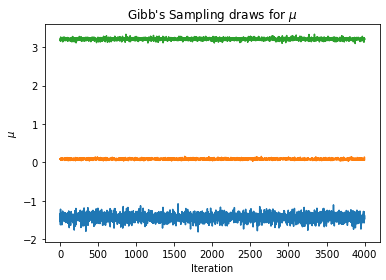

In [313]:
from matplotlib import pyplot as plt
plt.title("Gibb's Sampling draws for $\mu$") 
plt.xlabel("Iteration") 
plt.ylabel("$\mu$")
plt.plot(np.array(mu_draws)[:,0], alpha = 1)
plt.plot(np.array(mu_draws)[:,1], alpha = 1)
plt.plot(np.array(mu_draws)[:,2], alpha = 1)

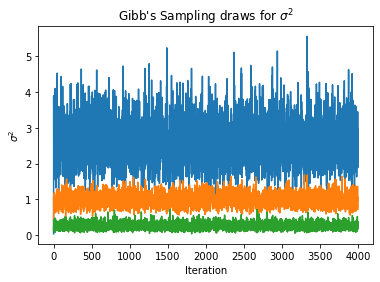

In [314]:
from matplotlib import pyplot as plt
plt.title("Gibb's Sampling draws for $\sigma^2$") 
plt.xlabel("Iteration") 
plt.ylabel("$\sigma^2$")
plt.plot(np.array(sigma_draws)[:,0], alpha = 1)
plt.plot(np.array(sigma_draws)[:,1], alpha = 1)
plt.plot(np.array(sigma_draws)[:,2], alpha = 1)

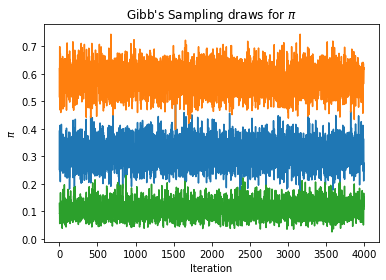

In [315]:
from matplotlib import pyplot as plt
plt.title("Gibb's Sampling draws for $\pi$") 
plt.xlabel("Iteration") 
plt.ylabel("$\pi$")
plt.plot(np.array(pi_draws)[:,0], alpha = 1)
plt.plot(np.array(pi_draws)[:,1], alpha = 1)
plt.plot(np.array(pi_draws)[:,2], alpha = 1)

**b)**
I would consider the first 25-50 iterations as burn-in. After those iterations are removed, there appears to be convergence for each of the parameters.


**c)**

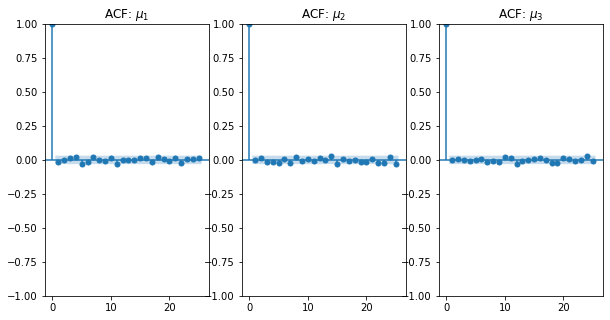

In [316]:
from statsmodels.graphics.tsaplots import plot_acf

#remove burn in, 25 samples
burnin = 25

fig, ax = plt.subplots(1,3,figsize=(10,5))
plot_acf(np.array(mu_draws)[burnin:,0], lags=25, ax = ax[0]);
plot_acf(np.array(mu_draws)[burnin:,1], lags=25, ax = ax[1]);
plot_acf(np.array(mu_draws)[burnin:,2], lags=25, ax = ax[2]);
ax[0].set_title("ACF: $\mu_1$");
ax[1].set_title("ACF: $\mu_2$");
ax[2].set_title("ACF: $\mu_3$");


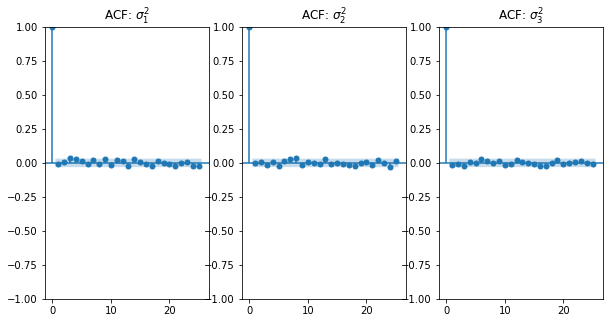

In [317]:
#remove burn in, 25 samples
burnin = 25

fig, ax = plt.subplots(1,3,figsize=(10,5))
plot_acf(np.array(sigma_draws)[burnin:,0], lags=25, ax = ax[0]);
plot_acf(np.array(sigma_draws)[burnin:,1], lags=25, ax = ax[1]);
plot_acf(np.array(sigma_draws)[burnin:,2], lags=25, ax = ax[2]);
ax[0].set_title("ACF: $\sigma^2_1$");
ax[1].set_title("ACF: $\sigma^2_2$");
ax[2].set_title("ACF: $\sigma^2_3$");

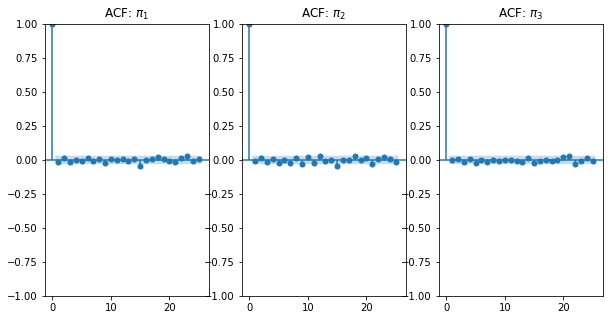

In [318]:
#remove burn in, 25 samples
burnin = 25

fig, ax = plt.subplots(1,3,figsize=(10,5))
plot_acf(np.array(pi_draws)[burnin:,0], lags=25, ax = ax[0]);
plot_acf(np.array(pi_draws)[burnin:,1], lags=25, ax = ax[1]);
plot_acf(np.array(pi_draws)[burnin:,2], lags=25, ax = ax[2]);
ax[0].set_title("ACF: $\pi_1$");
ax[1].set_title("ACF: $\pi_2$");
ax[2].set_title("ACF: $\pi_3$");

**d)**

In [319]:
burnin = 25

mus = np.array(mu_draws)[burnin:,]
sigmas = np.array(sigma_draws)[burnin:,]
pi_s = np.array(pi_draws)[burnin:,]

posterior_mus = np.mean(mus, axis = 0)


posterior_sigmas = np.mean(sigmas, axis = 0)
posterior_pi_s = np.mean(pi_s, axis = 0)

#posterior mean for mus:
print("Posterior means: ")
print("\t mu_1: {:.3f}".format(posterior_mus[0]))
print("\t mu_2: {:.3f}".format(posterior_mus[1]))
print("\t mu_3: {:.3f}".format(posterior_mus[2]))


print("Posterior sigma squareds: ")
print("\t sigma2_1: {:.3f}".format(posterior_sigmas[0]))
print("\t sigma2_2: {:.3f}".format(posterior_sigmas[1]))
print("\t sigma2_3: {:.3f}".format(posterior_sigmas[2]))

print("Posterior pi_s: ")
print("\t pi_1: {:.3f}".format(posterior_pi_s[0]))
print("\t pi_2: {:.3f}".format(posterior_pi_s[1]))
print("\t pi_3: {:.3f}".format(posterior_pi_s[2]))


####### Credible Intervals
#function 
def cred_interval(parameters: np.array):
    lower_bound = np.quantile(parameters, .025)
    upper_bound = np.quantile(parameters, .975)
    return([round(lower_bound,4), round(upper_bound,4)])

#credible intervals 
print("Posterior mean Credible Intervals: ")
print("\t mu_1: {}".format(cred_interval(mus[0])))
print("\t mu_2: {}".format(cred_interval(mus[1])))
print("\t mu_3: {}".format(cred_interval(mus[2])))


print("Posterior sigma squared Credible Intervals: ")
print("\t sigma2_1: {}".format(cred_interval(sigmas[0])))
print("\t sigma2_2: {}".format(cred_interval(sigmas[1])))
print("\t sigma2_3: {}".format(cred_interval(sigmas[2])))

print("Posterior pi Credible Intervals: ")
print("\t pi_1: {}".format(cred_interval(pi_s[0])))
print("\t pi_2: {}".format(cred_interval(pi_s[1])))
print("\t pi_3: {}".format(cred_interval(pi_s[2])))



Posterior means: 
	 mu_1: -1.430
	 mu_2: 0.090
	 mu_3: 3.212
Posterior sigma squareds: 
	 sigma2_1: 2.587
	 sigma2_2: 0.993
	 sigma2_3: 0.257
Posterior pi_s: 
	 pi_1: 0.311
	 pi_2: 0.582
	 pi_3: 0.107
Posterior mean Credible Intervals: 
	 mu_1: [-1.3385, 3.0304]
	 mu_2: [-1.3817, 3.0762]
	 mu_3: [-1.3507, 3.0219]
Posterior sigma squared Credible Intervals: 
	 sigma2_1: [0.3081, 2.3994]
	 sigma2_2: [0.1849, 2.1312]
	 sigma2_3: [0.3129, 1.4779]
Posterior pi Credible Intervals: 
	 pi_1: [0.1143, 0.5936]
	 pi_2: [0.0889, 0.5074]
	 pi_3: [0.1169, 0.5812]


In [320]:
[sum(label == k) / 100 for k in range(3)]

[0.31, 0.59, 0.1]

In [321]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=2).fit(data.reshape(-1,1))
gm.precisions_

array([[[1.3242416 ]],

       [[3.98548723]],

       [[0.3004291 ]]])

True means: -1.5, 0, 3

My findings definitely seem off. The estimates I obtain using `GaussianMixture` from `sklearn` do not seem aligned with the true mean values of the distributions the data is generated from. They also do not seem comparable to the estimates I obtained using the algorithm I implemented myself. I feel like i was super close but couldn't identify where I am going wrong.

### Exercise 3 (Kernel density estimation)

_If you do not have time to complete this question, you can submit your solution with hw4. You will not lose any penalty points if you choose to do so._

The data set ``n90_pol.csv`` contains information on 90 British university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views.

The variables ``amygdala`` and ``acc`` indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar anatomical variables. The variable ``orientation`` gives the subjects’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal). orientation is an ordinal but not a metric variable, so scores of 1 and 2 are not necessarily as far apart as scores of 2 and 3.

1. Estimate the probability density for the volume of the amygdala. Plot it and report the bandwidth. Repeat this for the volume of the ACC.
2. Estimate a joint probability density for the volumes of the amygdala and the ACC. What are the bandwidths? Are they the same as the bandwidths you got in problem 1? Should they be?
3. Plot the joint density. Does it suggest the two volumes are statistically independent? Should they be? You may use three dimensions, color, contours, etc., for your plot, but you will be graded, in part, on how easy to read it is. (Hint: Remember that the random variables $X$ and $Y$ are statistically independent when their joint pdf is the product of their marginal pdfs, $p(x, y) = p(x)p(y)$. Think about what the product of your estimated pdfs from question 1 would look like.

In [322]:
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde #gaussian kernel KDE


#import data
df = pd.read_csv("n90_pol.csv")
df.head()

,subject,amygdala,acc,orientation
0,1,0.0051,-0.0286,2
1,2,-0.0674,0.0007,3
2,3,-0.0257,-0.0110,3
3,4,0.0504,-0.0167,2
4,5,0.0125,-0.0005,5


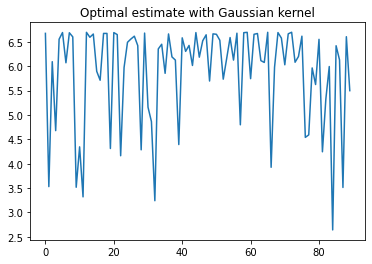

optimal bandwidth: 0.05


In [323]:
#1 estimate the probability density function of amygdala 

#using sklearn

bandwidth = np.arange(.05,2,.05)

kde_amygdala = KernelDensity(kernel = "gaussian")

grid = GridSearchCV(kde_amygdala,{'bandwidth': bandwidth})

grid.fit(df[['amygdala']])

#now lets see what the best bandwidth parameter was (the one that resulted in the largest likelihood)
kde = grid.best_estimator_
log_dens = kde.score_samples(df[['amygdala']])
probs = np.exp(log_dens)
plt.plot(probs)
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

/Users/collinkennedy/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amygdala Volume ')

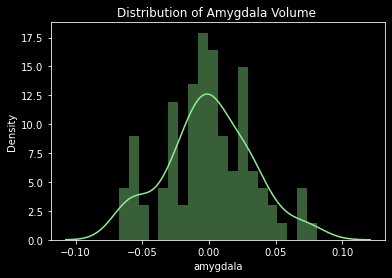

In [324]:
#first lets just take a look at the data
from matplotlib import style
style.use('dark_background')
sns.distplot(df['amygdala'], bins = 20, kde = True,color = 'lightgreen')
plt.title("Distribution of Amygdala Volume ")

bandwidth = 0.407


/var/folders/zd/drh5nccn0bq4w08_z0z0lzkr0000gn/T/ipykernel_88429/727289228.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_axis,vals, 'k', color = "white")


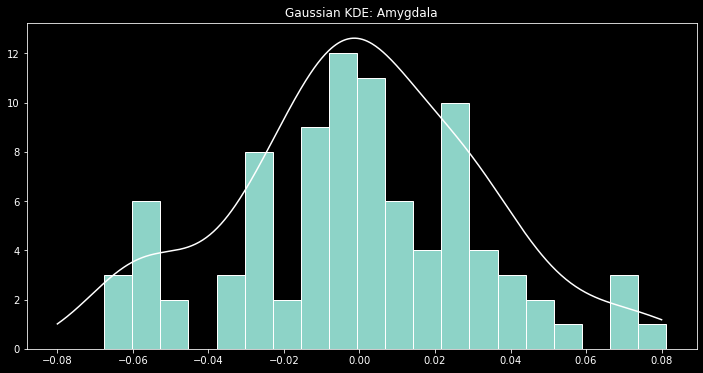

In [325]:
#using scipy instead: first for amygdala
scipy_kernel = gaussian_kde(df['amygdala'])

#generate x axis values for the kernel density
x_axis = np.linspace(-.08,.08,500)
vals = scipy_kernel.evaluate(x_axis)

#use matplotlib to plot the histogram, then superimpose the density I estimated
plt.figure(figsize = (12,6))
counts, bins, patches = plt.hist(df['amygdala'],bins = 20, edgecolor = 'white')
plt.plot(x_axis,vals, 'k', color = "white")
plt.title("Gaussian KDE: Amygdala")
print('bandwidth = {}'.format(round(scipy_kernel.factor,3)))



bandwidth = 0.407


/var/folders/zd/drh5nccn0bq4w08_z0z0lzkr0000gn/T/ipykernel_88429/1295760405.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_axis,vals, 'k', color = "white")


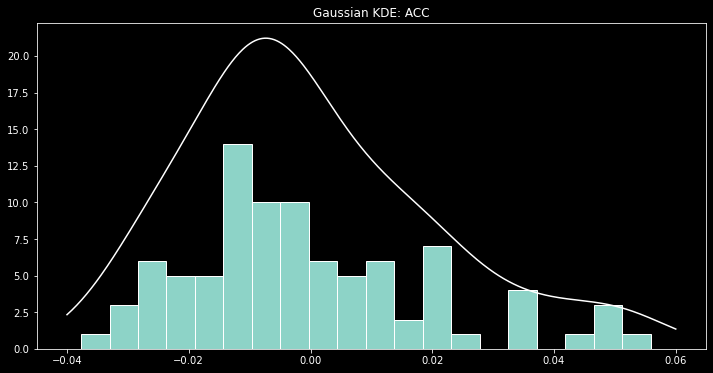

In [326]:
scipy_kernel_acc = gaussian_kde(df['acc'])

#generate x axis values for the kernel density
x_axis = np.linspace(-.04,.06,500)
vals = scipy_kernel_acc.evaluate(x_axis)

#use matplotlib to plot the histogram, then superimpose the density I estimated
plt.figure(figsize = (12,6))
counts, bins, patches = plt.hist(df['acc'],bins = 20, edgecolor = 'white')
plt.plot(x_axis,vals, 'k', color = "white")
plt.title("Gaussian KDE: ACC")
print('bandwidth = {}'.format(round(scipy_kernel_acc.factor,3)))

Will finish this for Homework #4